We will begin by reading in our data and conducting some exploratory data analysis.

In [1]:
# import libraries and read files as data frames and do EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data frame
sf_dev_projs = pd.read_csv('./data/five_yr_pipeline.csv')

/var/folders/yh/b24zcpkj281fq42xxb9z60mr0000gn/T/ipykernel_86520/3757900690.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_dev_projs = pd.read_csv('./data/five_yr_pipeline.csv')


In [3]:
# preview data frame head
sf_dev_projs.head()

,landuse,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,unitsnet,pipelineunits,...,heightbul,pda,longitude,latitude,year,qtr,yearqtr,latlong,currentpolicedistricts,affordable
0,Resident,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,None applied,0.0,1.0,1.0,...,40-X,Richmond Corridors,-122.508817,37.772600,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,0.0
1,Vacant,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,None applied,0.0,0.0,0.0,...,270-CS,Eastern Neighborhoods,-122.400848,37.776946,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),1.0,0.0
2,Resident,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,Bayview/Southeast Neighborhoods,-122.388080,37.718621,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),2.0,0.0
3,Resident,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,J Church and Mission Corridor,-122.433855,37.736508,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),9.0,0.0
4,Resident,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,0,-122.441421,37.735635,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),9.0,0.0


Before beginning our exploratory data analysis, we will first make a copy of our five year pipeline dataframe dropping any duplicate addresses, keeping only the first and therefore most recent occurrence of the same property. The purpose of this for our EDA is to be able to compare all the most recent proprties in the pipeline instead comparing properties showing up multiple times over several quarters. This will give us a more accurate snapshot of the development pipeline as a cross-section to prepare for our clustering model first.

In [4]:
# creates a copy of our data frame without any duplicate addresses
distinct_prop = sf_dev_projs.drop_duplicates(subset = 'nameaddr').copy()

In [5]:
# previews the new data frame
distinct_prop

,landuse,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,unitsnet,pipelineunits,...,heightbul,pda,longitude,latitude,year,qtr,yearqtr,latlong,currentpolicedistricts,affordable
0,Resident,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,None applied,0.0,1.0,1.0,...,40-X,Richmond Corridors,-122.508817,37.772600,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,0.0
1,Vacant,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,None applied,0.0,0.0,0.0,...,270-CS,Eastern Neighborhoods,-122.400848,37.776946,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),1.0,0.0
2,Resident,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,Bayview/Southeast Neighborhoods,-122.388080,37.718621,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),2.0,0.0
3,Resident,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,J Church and Mission Corridor,-122.433855,37.736508,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),9.0,0.0
4,Resident,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,0,-122.441421,37.735635,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43184,Resident,81 NOE ST,True,BP APPROVED,10/01/2012 12:00:00 AM,3.0,None applied,0.0,1.0,1.0,...,Unknown,Market & Octavia,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7678968336, -122.433131537)",7.0,0.0
43188,Unknown,4534 MISSION ST,False,PL FILED,03/08/2018 12:00:00 AM,4.0,None applied,0.0,4.0,1.0,...,Unknown,Mission-San Jose Corridor,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7254518373, -122.434584771)",9.0,0.0
43194,Unknown,936 HOLLISTER AVE,False,PL FILED,03/20/2018 12:00:00 AM,1.0,None applied,0.0,1.0,1.0,...,Unknown,Bayview/Hunters Point Shipyard/Candlestick Point,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7185382776, -122.389810395)",2.0,0.0
43198,Unknown,505 26TH AVE,False,PL FILED,02/01/2018 12:00:00 AM,3.0,None applied,0.0,3.0,1.0,...,Unknown,Rest of the City,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7797312955, -122.485978127)",8.0,0.0


First, we shall preview some of the summary statistics overall for our numerical data and then do a deeper dive into some visualizations of the most salient features. For the purposes of narrowing our focus, we will mostly hone in on the net features, as these are most important at end of the construction pipeline for building additional homes, affordable housing, or square footage.

In [6]:
# show summary statistics of numerical feature
distinct_prop.describe()

,units,tcocfcunits,unitsnet,pipelineunits,affordablenet,totalgsf,netgsf,cieexist,cie,cienet,...,hotelroomexist,hotelroomprop,hotelroomnet,legalization,adu,sd22,longitude,latitude,year,affordable
count,4016.000000,4016.000000,4016.000000,4016.00000,4016.000000,4.016000e+03,4.016000e+03,4016.000000,4016.000000,4016.000000,...,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,3801.000000,3801.000000,3906.000000,4016.000000
mean,30.416584,2.024153,26.356076,18.70991,5.379731,1.679349e+04,9.377622e+03,93.019173,1238.515438,747.371514,...,0.264691,1.945468,1.680777,0.063247,0.177540,6.490040,-122.433861,37.757808,2021.159242,1.742779
std,277.614971,21.159789,228.059306,206.82296,55.335409,2.195446e+05,1.188956e+05,4707.376332,18999.858187,15527.874266,...,8.678162,22.701172,22.070637,0.313235,0.432322,3.219554,0.032008,0.025286,1.323185,18.437017
min,-1.000000,0.000000,-34.000000,-34.00000,-1.000000,0.000000e+00,-2.998454e+06,0.000000,0.000000,-99024.000000,...,0.000000,0.000000,-402.000000,-1.000000,-1.000000,0.000000,-122.509596,37.708252,2018.000000,0.000000
25%,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-122.455922,37.737477,2021.000000,0.000000
50%,2.000000,0.000000,1.000000,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,-122.429327,37.759211,2022.000000,0.000000
75%,4.000000,0.000000,2.000000,2.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,-122.409742,37.778194,2022.000000,0.000000
max,9119.000000,550.000000,9119.000000,9119.00000,2565.000000,1.160000e+07,3.801500e+06,296125.000000,730888.000000,730888.000000,...,402.000000,516.000000,500.000000,1.000000,1.000000,11.000000,-122.365320,37.825281,2022.000000,526.000000


Looking at our summary statistics, we can see that net units and net pipeline units have nearly identical summary statistics. This is not surprising since the net pipeline units includes only those for which a TCO, Temporary Certificate of Occupancy, has not been applied for and very few buildings have a TCO. Therefore, for ongoing analysis we shall mostly focus on net units as this is the larger and more inclusive category. The next important thing to notice is that for the net affordable housing, the overwhelming majory of values are zero affordable units. Granted this includes all construction including projects which are not residential at all. Additionally for all net units, pipeline units, net affordable units, and even non-residential properties such as net cultural, institutional, and educational (CIE) square footage or hotel net room, the data show a heavily skewed left distribution with few projects representing the lion's share of the new net housing or square footage added in the city.

Let's look at land uses more closely. before disaggregating some of our net housing measures according to land uses.

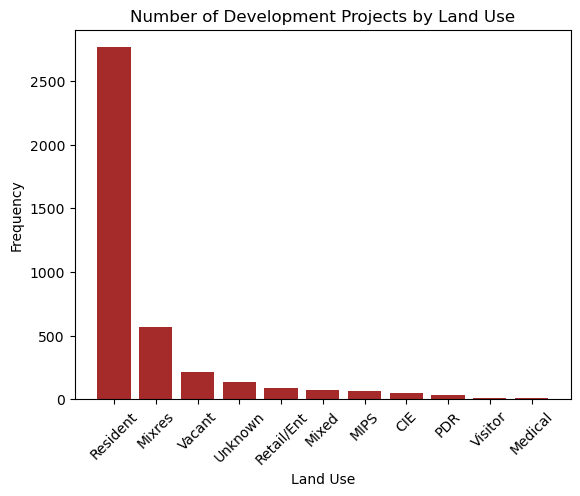

In [7]:
# creates a bar plot of development land uses
plt.bar(x = distinct_prop['landuse'].value_counts().index, height = distinct_prop['landuse'].value_counts().values, color = 'brown')
plt.xticks(rotation = 45)
plt.xlabel('Land Use')
plt.ylabel('Frequency')
plt.title('Number of Development Projects by Land Use');

In [8]:
# show summary statistics of numerical feature
distinct_prop[['unitsnet', 'affordablenet']].describe()

,unitsnet,affordablenet
count,4016.000000,4016.000000
mean,26.356076,5.379731
std,228.059306,55.335409
min,-34.000000,-1.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,0.000000
max,9119.000000,2565.000000


In [9]:
distinct_prop.groupby('landuse')[['unitsnet']].describe()

unitsnet                                                      
              count        mean         std   min  25%  50%   75%     max
landuse                                                                  
CIE            49.0   -0.795918    4.856180 -34.0  0.0  0.0   0.0     0.0
MIPS           66.0    2.212121   17.971358   0.0  0.0  0.0   0.0   146.0
Medical         8.0    0.000000    0.000000   0.0  0.0  0.0   0.0     0.0
Mixed          70.0   38.228571  322.767614 -25.0  0.0  0.0   0.0  2700.0
Mixres        572.0  125.596154  571.351055  -3.0  1.0  9.0  69.5  9119.0
PDR            34.0    8.235294   48.019604   0.0  0.0  0.0   0.0   280.0
Resident     2764.0    9.031476   48.641413  -4.0  1.0  1.0   2.0  1110.0
Retail/Ent     88.0    5.125000   21.651796   0.0  0.0  0.0   0.0   116.0
Unknown       133.0   11.015038   40.745698  -1.0  1.0  1.0   4.0   385.0
Vacant        218.0   18.605505   88.108492  -2.0  0.0  0.0   1.0   829.0
Visitor        14.0    0.500000    1.870829   0.0  0.0  0.0   0.0     7.0

In [10]:
distinct_prop.groupby('landuse')[['affordablenet']].describe()

affordablenet                                                   
                   count       mean         std  min  25%  50%  75%     max
landuse                                                                    
CIE                 49.0   0.000000    0.000000  0.0  0.0  0.0  0.0     0.0
MIPS                66.0   1.803030   14.647887  0.0  0.0  0.0  0.0   119.0
Medical              8.0   0.000000    0.000000  0.0  0.0  0.0  0.0     0.0
Mixed               70.0   0.000000    0.000000  0.0  0.0  0.0  0.0     0.0
Mixres             572.0  25.527972  138.494650 -1.0  0.0  0.0  6.0  2565.0
PDR                 34.0   1.235294    7.202941  0.0  0.0  0.0  0.0    42.0
Resident          2764.0   2.049928   17.078867 -1.0  0.0  0.0  0.0   307.0
Retail/Ent          88.0   0.272727    2.558409  0.0  0.0  0.0  0.0    24.0
Unknown            133.0   5.849624   38.647689  0.0  0.0  0.0  0.0   385.0
Vacant             218.0   1.669725   14.987279  0.0  0.0  0.0  0.0   184.0
Visitor             14.0   0.714286    2.672612  0.0  0.0  0.0  0.0    10.0

Looking at our bar plot above, the first good news is that it appears that over 3,200 of the 4,106 unique development projects in the pipeline are either residential or mixed residential land uses. Also, looking at the center and spread of the 133 unknown land uses, they most closely resemble something close the residential or mixed residential centers and spreads, indicating that these unknown land uses are likely residential properties of some kind, although this is merely speculation. That being said approximately 80% of the projects in the pipeline are housing projects of some kind. The troubling news is that middle half of those projects create 1-2 net units in total and 0 net affordable units. Again, this is for all development projects including the 20% or so which are not residential in nature.

To deal with some of this complexity, let's look at the net units and net affordable units only for residential projects. For now, we shall exclude the unknown land uses since there are only 133 projects, and we cannot say with certainty how many of them are meant to be residential projects.

In [11]:
# displays the total net units and net affordable units in the development pipeline for residential land uses
distinct_prop[distinct_prop['landuse'] == 'Resident'][['unitsnet', 'affordablenet']].sum()

unitsnet         24963.0
affordablenet     5666.0
dtype: float64

In [12]:
# displays the total net units and net affordable units in the development pipeline for mixed residential land uses
distinct_prop[distinct_prop['landuse'] == 'Mixres'][['unitsnet', 'affordablenet']].sum()

unitsnet         71841.0
affordablenet    14602.0
dtype: float64

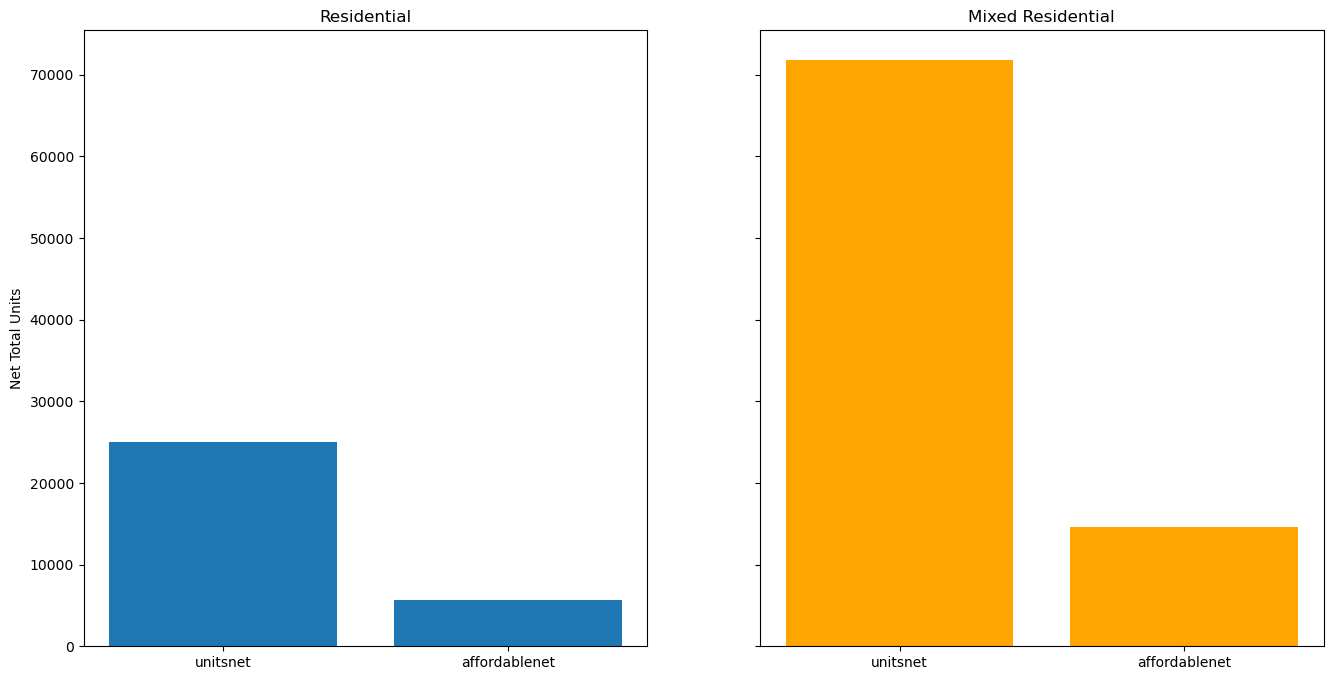

In [13]:
# shows the total projected net units and net affordable units
fig, ax = plt.subplots(1, 2, sharex=True, sharey = True, figsize = (16, 8))

plt.subplot(1,2,1)
plt.bar(distinct_prop[distinct_prop['landuse'] == 'Resident'][['unitsnet', 'affordablenet']].sum().index, 
        distinct_prop[distinct_prop['landuse'] == 'Resident'][['unitsnet', 'affordablenet']].sum().values)
plt.title('Residential')
plt.ylabel('Net Total Units')

plt.subplot(1,2,2)
plt.bar(distinct_prop[distinct_prop['landuse'] == 'Mixres'][['unitsnet', 'affordablenet']].sum().index, 
        distinct_prop[distinct_prop['landuse'] == 'Mixres'][['unitsnet', 'affordablenet']].sum().values, color = 'orange')
plt.title('Mixed Residential');

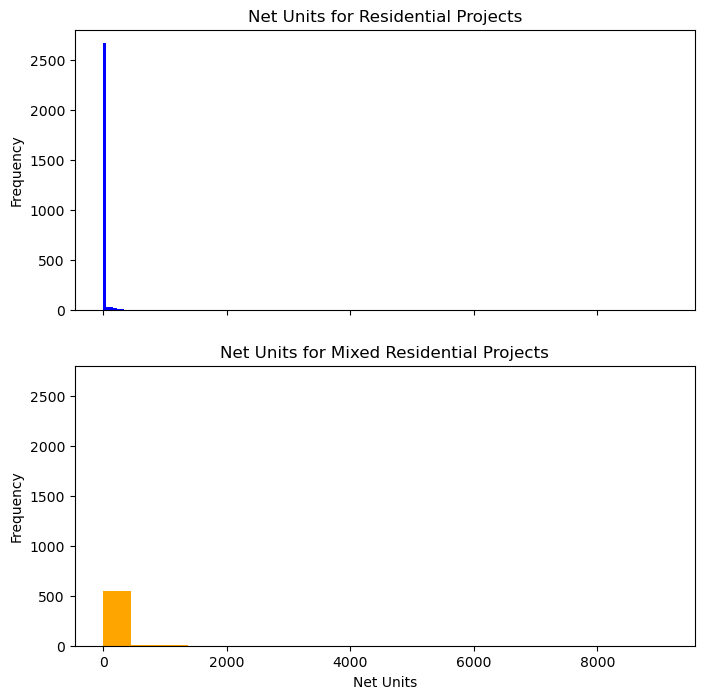

In [14]:
# shows the distribution of net units for residential and mixed residential land uses
fig, ax = plt.subplots(2, 1, sharex=True, sharey = True, figsize = (8, 8))

plt.subplot(2,1,1)
plt.hist(distinct_prop[distinct_prop['landuse'] == 'Resident']['unitsnet'], color = 'blue', bins = 20)
plt.ylabel('Frequency')
plt.title('Net Units for Residential Projects')

plt.subplot(2,1,2)
plt.hist(distinct_prop[distinct_prop['landuse'] == 'Mixres']['unitsnet'], color = 'orange', bins = 20)
plt.xlabel('Net Units')
plt.ylabel('Frequency')
plt.title('Net Units for Mixed Residential Projects');

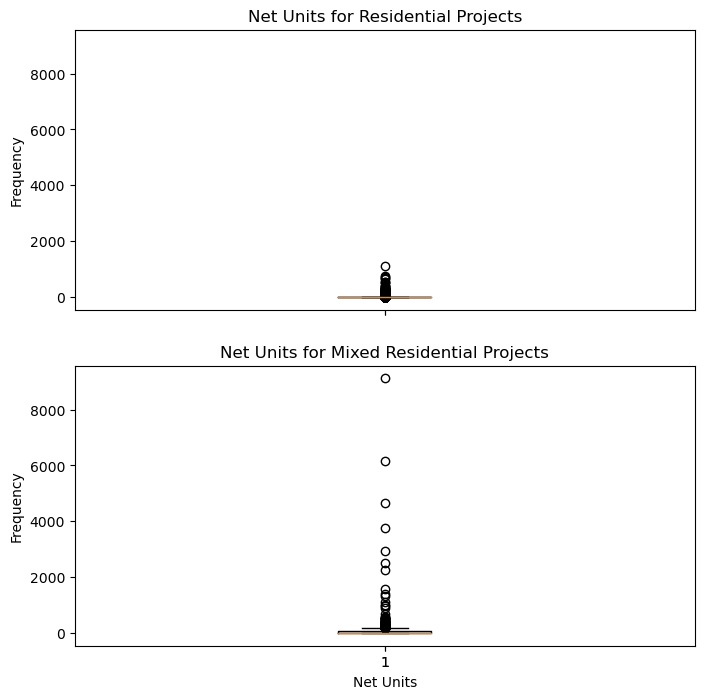

In [15]:
# creates boxplots of the net units
fig, ax = plt.subplots(2, 1, sharex=True, sharey = True, figsize = (8, 8))

plt.subplot(2,1,1)
plt.boxplot(distinct_prop[distinct_prop['landuse'] == 'Resident']['unitsnet'])
plt.ylabel('Frequency')
plt.title('Net Units for Residential Projects')

plt.subplot(2,1,2)
plt.boxplot(distinct_prop[distinct_prop['landuse'] == 'Mixres']['unitsnet'])
plt.xlabel('Net Units')
plt.ylabel('Frequency')
plt.title('Net Units for Mixed Residential Projects');

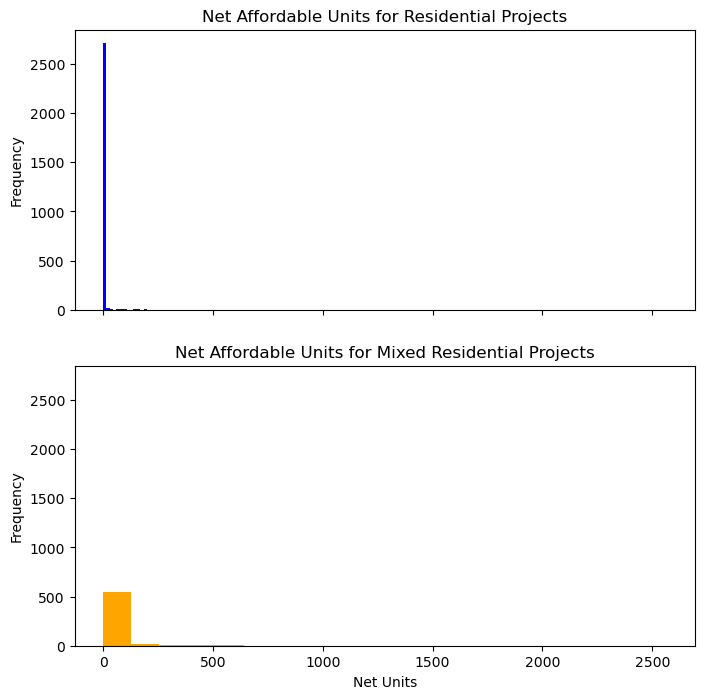

In [16]:
# shows the distribution of net affordable units for residential and mixed residential land uses
fig, ax = plt.subplots(2, 1, sharex=True, sharey = True, figsize = (8, 8))

plt.subplot(2,1,1)
plt.hist(distinct_prop[distinct_prop['landuse'] == 'Resident']['affordablenet'], color = 'blue', bins = 20)
plt.ylabel('Frequency')
plt.title('Net Affordable Units for Residential Projects')

plt.subplot(2,1,2)
plt.hist(distinct_prop[distinct_prop['landuse'] == 'Mixres']['affordablenet'], color = 'orange', bins = 20)
plt.xlabel('Net Units')
plt.ylabel('Frequency')
plt.title('Net Affordable Units for Mixed Residential Projects');

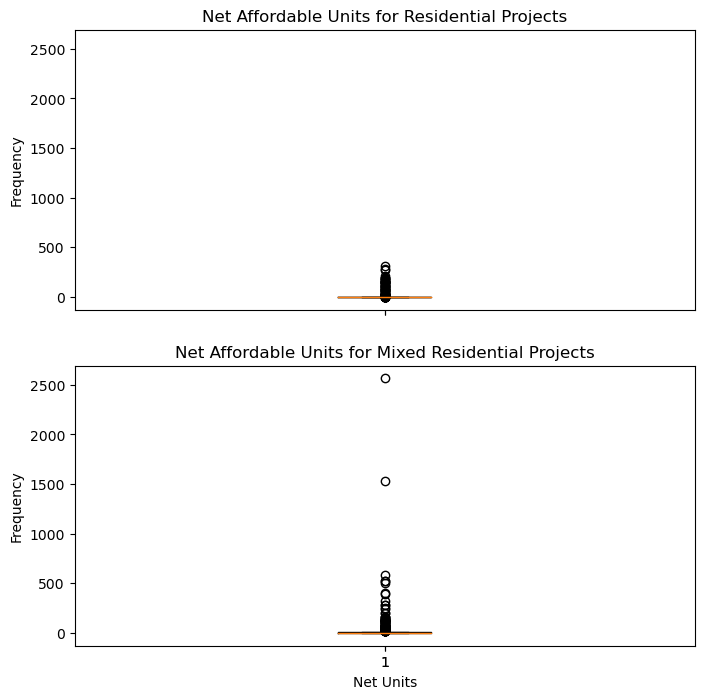

In [17]:
# creates boxplots of the net affordable units
fig, ax = plt.subplots(2, 1, sharex=True, sharey = True, figsize = (8, 8))

plt.subplot(2,1,1)
plt.boxplot(distinct_prop[distinct_prop['landuse'] == 'Resident']['affordablenet'])
plt.ylabel('Frequency')
plt.title('Net Affordable Units for Residential Projects')

plt.subplot(2,1,2)
plt.boxplot(distinct_prop[distinct_prop['landuse'] == 'Mixres']['affordablenet'])
plt.xlabel('Net Units')
plt.ylabel('Frequency')
plt.title('Net Affordable Units for Mixed Residential Projects');

Looking at the visuals above, we can identify some common trends in the data. It is important to note that the net affordable units are a subset of the net units, not an addition to the total net units, so we can analyze the affordable units as a proportion of the total units. First, we can see that although there are nearly five times as many residential projects as there are mixed residential projects, the mixed residential projects result in nearly three times as many net units and net affordable units. Also, in comparing residential and mixed residential, both have a similar proportion of net affordable units at 22.7% and 20.3%, respectively. Looking at our distributions the outliers are perhaps the most telling. For residential properties, the net units have several outliers but they just barely exceed 1,000 net units whereas the mixed residential properties have multiple outliers well beyond 1,000 with a couple mammoth projects reaching beyond 4,000 net units. The same trend is visible in the net affordable units. We can see that the residential units have several outliers but they barely reach 300 net affordable units. In contrast, the mixed residential properties have several outliers well beyond 300. In either case, we can see that it is a smal handful of properties which have an outsized impact on the net units and net affordable units being added in the aggregate to the San Francisco development pipeline. The seemingly larger impact of mixed residential land uses also seems to make sense because most mixed residential properties tend to be zoned in more dense areas mixed with commercial zoning properties, so these tend to be larger developments.

Next, let's look at if there is any connection clear connection between units being built and affordable units.

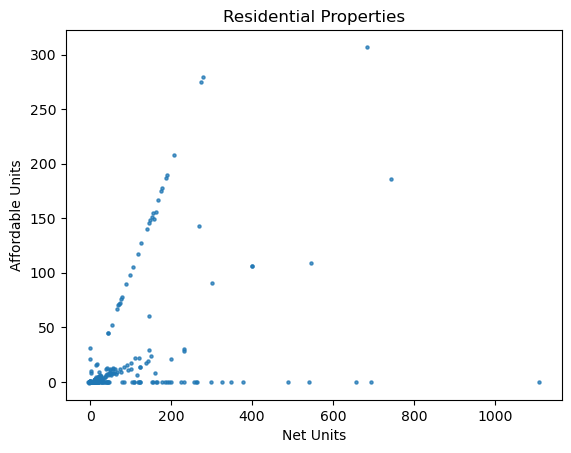

In [18]:
# creates a scatter plot of net units vs. net affordable units
plt.scatter(distinct_prop[distinct_prop['landuse'] == 'Resident']['unitsnet'], 
            distinct_prop[distinct_prop['landuse'] == 'Resident']['affordablenet'],
            s = 5,
            alpha = 0.75
           )
plt.xlabel('Net Units')
plt.ylabel('Affordable Units')
plt.title('Residential Properties');

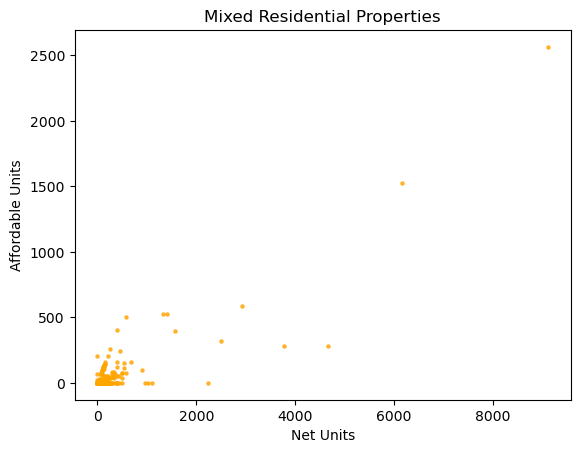

In [19]:
# create a scatter plot of net units 
plt.scatter(distinct_prop[distinct_prop['landuse'] == 'Mixres']['unitsnet'], 
            distinct_prop[distinct_prop['landuse'] == 'Mixres']['affordablenet'],
            s = 5,
            alpha = 0.75,
            c = 'orange'
           )
plt.xlabel('Net Units')
plt.ylabel('Affordable Units')
plt.title('Mixed Residential Properties');

In [20]:
temp_wo_outliers = distinct_prop[distinct_prop['unitsnet'] < 2000]

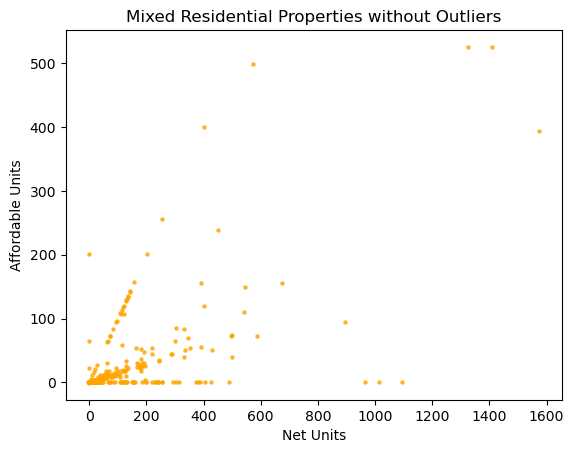

In [21]:
plt.scatter(temp_wo_outliers[temp_wo_outliers['landuse'] == 'Mixres']['unitsnet'], 
            temp_wo_outliers[temp_wo_outliers['landuse'] == 'Mixres']['affordablenet'],
            s = 5,
            alpha = 0.75,
            c = 'orange'
           )

plt.xlabel('Net Units')
plt.ylabel('Affordable Units')
plt.title('Mixed Residential Properties without Outliers');

Looking at scatter plots above, we can see some pretty clear patterns in both the residential and mixed resendential projects. First, in both cases, it appears that there are three very separate trend lines. The first trend line is a flat line, indicating that there is a subset of housing development projects for which there is zero net affordable housing planned. The second trend line appears somewhere in the middle. While it is hard to discern exactly, it appears that this trend line appears to be somewhere around 10-15% of the net units are supposed to be slated for net affordable housing units. Lastly, there is one more clearly steep trend line. Again, while is it hard to discern exactly, it appears like this trend line appears to be somewhere around 90-100% of the units are slated for net affordable housing units. It would appear that San Francisco has some clear affordable housing goals which shoe horn some of these housing developments into specific affordable housing goals, one very modest and another very aggressive. This might be related to Section 415 of the planning code, but either way, we can see clear patterns of how much net affordable housing is being created as a proportion of the net units created.

Next, let us look at the affordable housing targets in the aggregate and then on the basis of land uses for residential purposes only.

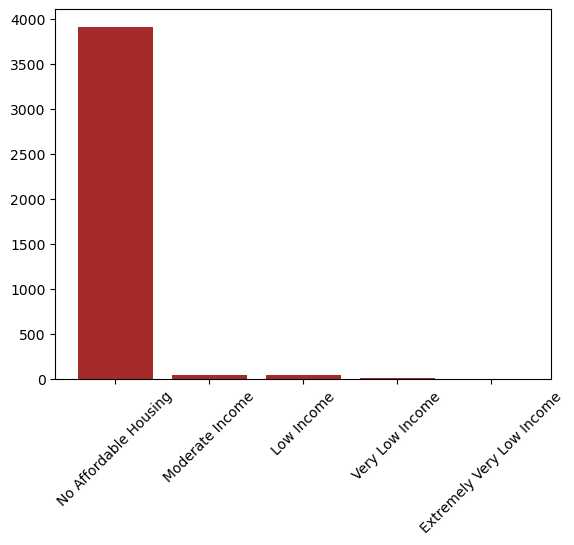

In [22]:
# creates a bar plot of all affordable housing targets by category
plt.bar(x = distinct_prop['afftarget'].value_counts().index, height = distinct_prop['afftarget'].value_counts().values, color = 'brown')
plt.xticks(rotation = 45);

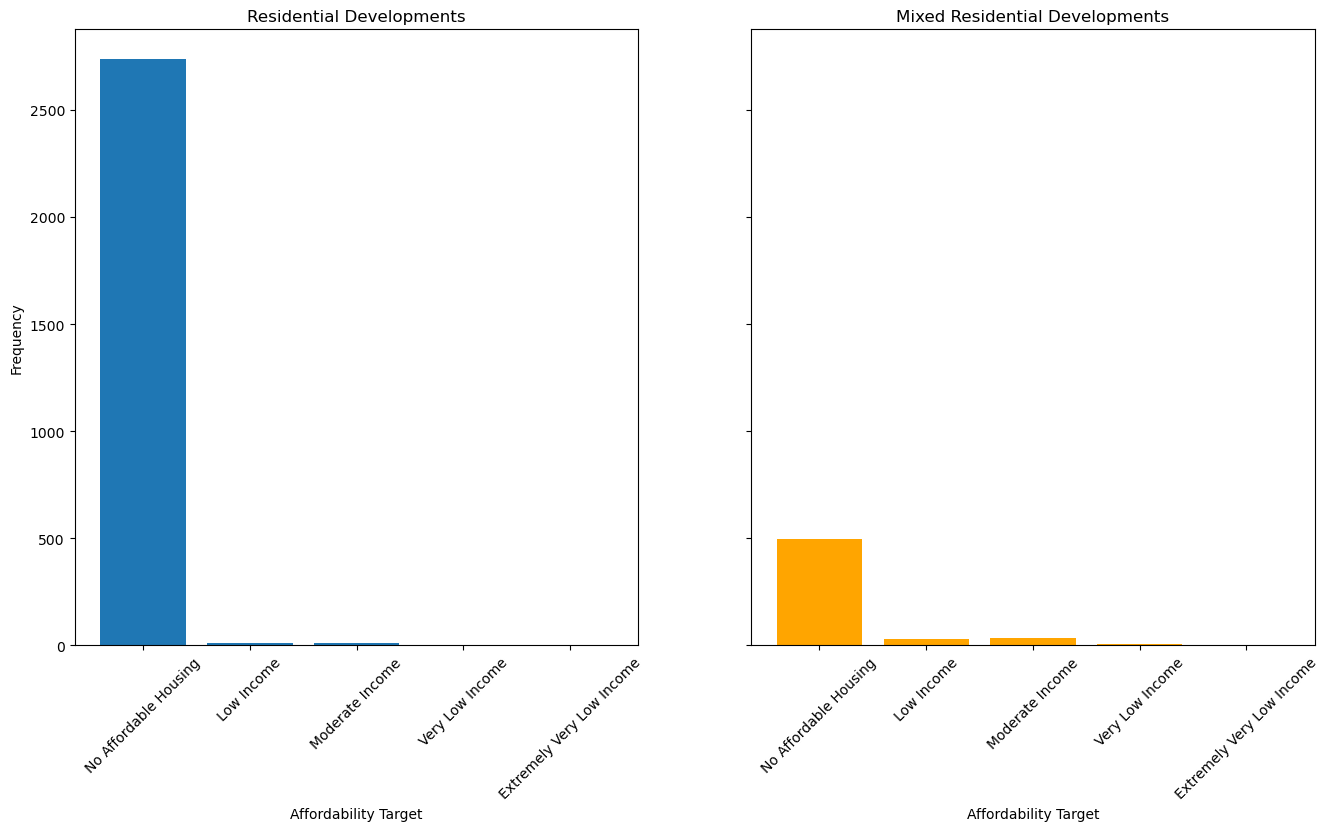

In [23]:
# creates boxplots of the net affordable units
fig, ax = plt.subplots(1, 2, sharex=True, sharey = True, figsize = (16, 8))

plt.subplot(1,2,1)
plt.bar(x = distinct_prop[distinct_prop['landuse'] == 'Resident']['afftarget'].value_counts().index, 
        height = distinct_prop[distinct_prop['landuse'] == 'Resident']['afftarget'].value_counts().values)
plt.xticks(rotation = 45)
plt.xlabel('Affordability Target')
plt.ylabel('Frequency')
plt.title('Residential Developments')

plt.subplot(1,2,2)
plt.bar(x = distinct_prop[distinct_prop['landuse'] == 'Mixres']['afftarget'].value_counts().index, 
        height = distinct_prop[distinct_prop['landuse'] == 'Mixres']['afftarget'].value_counts().values,
        color = 'orange')
plt.xticks(rotation = 45)
plt.xlabel('Affordability Target')
plt.title('Mixed Residential Developments');

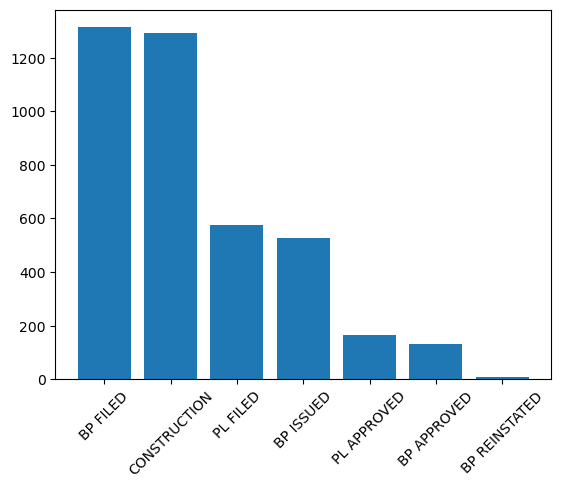

In [118]:
# 
plt.bar(x = distinct_prop['beststat'].value_counts().index, height = distinct_prop['beststat'].value_counts().values)
plt.xticks(rotation = 45);